Name : Chathumini B.G.D.T.

Index Number : 190107T

Assignment 3

Github Repo:
https://github.com/dulmi-19/Image-Processing-and-Machine-Vision


* Connected Component Analysis

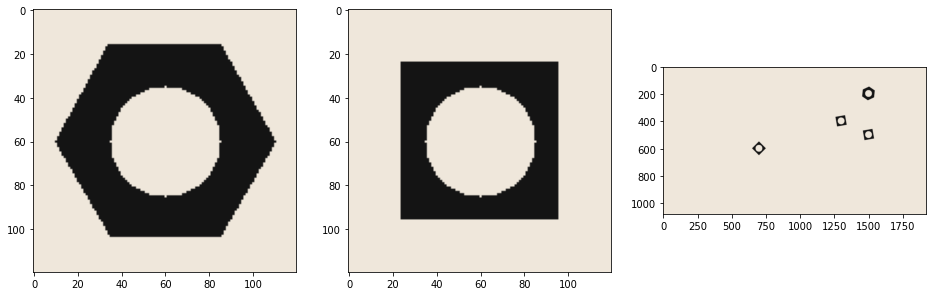

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(16,8))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

* Otsu's thresholding

Link: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

Hexnut Template Threshold value :  20.0
Squarenut Template Threshold value :  20.0
Conveyor Threshold value :  20.0


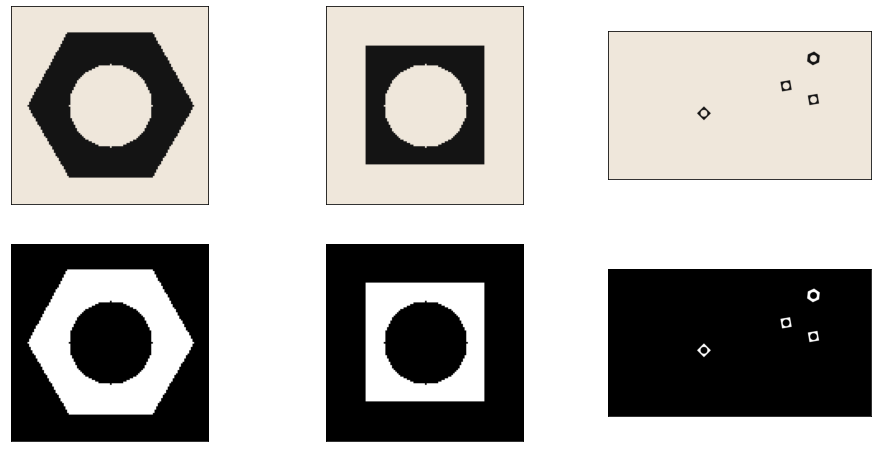

In [18]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

# Otsu's thresholding
ret_hexnut,th_hexnut = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_squarenut,th_squarenut = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_conveyor,th_conveyor = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print('Hexnut Template Threshold value : ', ret_hexnut)
print('Squarenut Template Threshold value : ', ret_squarenut)
print('Conveyor Threshold value : ', ret_conveyor)

fig, ax = plt. subplots(2,3,figsize=(16,8))
ax[0][0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[0][0].set_xticks([]), ax[0][0].set_yticks([])
ax[0][1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[0][1].set_xticks([]), ax[0][1].set_yticks([])
ax[0][2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
ax[0][2].set_xticks([]), ax[0][2].set_yticks([])

ax[1][0].imshow(cv.cvtColor(th_hexnut, cv.COLOR_RGB2BGR))
ax[1][0].set_xticks([]), ax[1][0].set_yticks([])
ax[1][1].imshow(cv.cvtColor(th_squarenut, cv.COLOR_RGB2BGR))
ax[1][1].set_xticks([]), ax[1][1].set_yticks([])
ax[1][2].imshow(cv.cvtColor(th_conveyor, cv.COLOR_RGB2BGR))
ax[1][2].set_xticks([]), ax[1][2].set_yticks([])

plt.show()


* Morphological Closing
(dilation followed by erosion)

Link: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

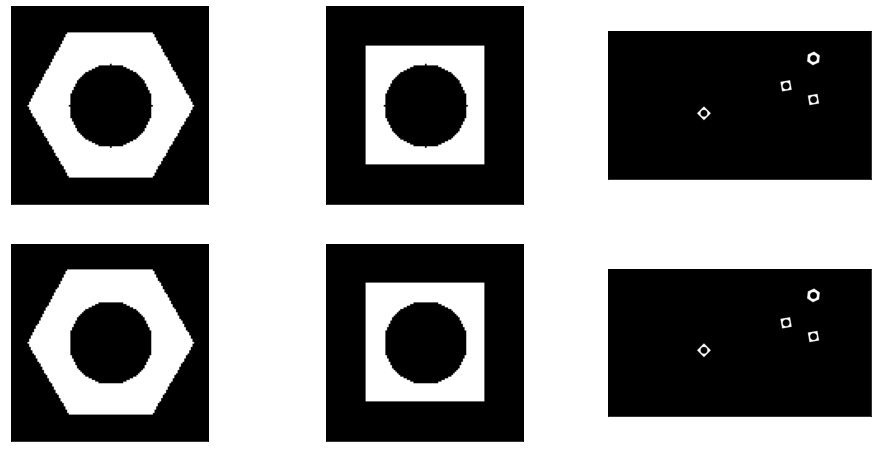

In [19]:
kernel = np.ones((3,3),np.uint8)
closing_hexnut = cv.morphologyEx(th_hexnut, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(th_squarenut, cv.MORPH_CLOSE, kernel)
closing_conveyor = cv.morphologyEx(th_conveyor, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(2,3,figsize=(16,8))
ax[0][0].imshow(cv.cvtColor(th_hexnut, cv.COLOR_RGB2BGR))
ax[0][0].set_xticks([]), ax[0][0].set_yticks([])
ax[0][1].imshow(cv.cvtColor(th_squarenut, cv.COLOR_RGB2BGR))
ax[0][1].set_xticks([]), ax[0][1].set_yticks([])
ax[0][2].imshow(cv.cvtColor(th_conveyor, cv.COLOR_RGB2BGR))
ax[0][2].set_xticks([]), ax[0][2].set_yticks([])

ax[1][0].imshow(cv.cvtColor(closing_hexnut, cv.COLOR_RGB2BGR))
ax[1][0].set_xticks([]), ax[1][0].set_yticks([])
ax[1][1].imshow(cv.cvtColor(closing_squarenut, cv.COLOR_RGB2BGR))
ax[1][1].set_xticks([]), ax[1][1].set_yticks([])
ax[1][2].imshow(cv.cvtColor(closing_conveyor, cv.COLOR_RGB2BGR))
ax[1][2].set_xticks([]), ax[1][2].set_yticks([])

plt.show()

* Connected components analysis

Link: 
https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f

In [33]:
Connectivity = 4
hex_n_labels, hex_labels, hex_stats, hex_centroids = cv.connectedComponentsWithStats(closing_hexnut, Connectivity, cv.CV_32S)
square_n_labels, square_labels, square_stats, square_centroids = cv.connectedComponentsWithStats(closing_squarenut, Connectivity, cv.CV_32S)
conv_n_labels, conv_labels, conv_stats, conv_centroids = cv.connectedComponentsWithStats(closing_conveyor, Connectivity, cv.CV_32S)

Hexnut Template
Number of connected components:  2
Statistics: 
     The leftmost (x) coordinate:  10
     The topmost (y) coordinate:  16
     The horizontal size of the bounding box:  101
     The vertical size of the bounding box:  88
     The total area (in pixels) of the connected component:  4728
Centroids: 
[[59.33684864 59.63513234]
 [59.83375635 59.22356176]]


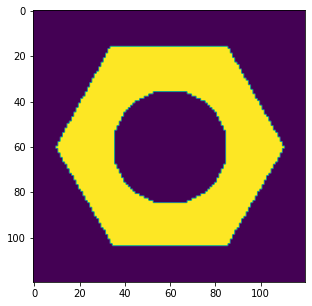

In [52]:
print('Hexnut Template')
print('Number of connected components: ', hex_n_labels)
print('Statistics: ')
print('     The leftmost (x) coordinate: ', hex_stats[1, cv.CC_STAT_LEFT])
print('     The topmost (y) coordinate: ', hex_stats[1, cv.CC_STAT_TOP])
print('     The horizontal size of the bounding box: ', hex_stats[1, cv.CC_STAT_WIDTH])
print('     The vertical size of the bounding box: ' ,hex_stats[1, cv.CC_STAT_HEIGHT])
print('     The total area (in pixels) of the connected component: ', hex_stats[1, cv.CC_STAT_AREA])
print('Centroids: ')
print(hex_centroids )

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(hex_labels)

Squarenut Template 
Number of connected components:  2
Statistics: 
     The leftmost (x) coordinate:  24
     The topmost (y) coordinate:  24
     The horizontal size of the bounding box:  72
     The vertical size of the bounding box:  72
     The total area (in pixels) of the connected component:  3227
Centroids: 
[[59.5875772  59.5875772 ]
 [59.19677719 59.19677719]]


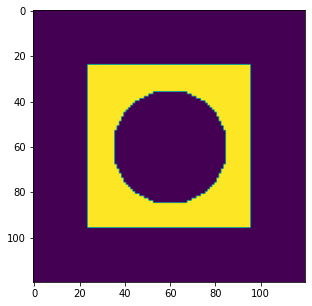

In [53]:
print('Squarenut Template ')
print('Number of connected components: ', square_n_labels)
print('Statistics: ')
print('     The leftmost (x) coordinate: ', square_stats[1, cv.CC_STAT_LEFT])
print('     The topmost (y) coordinate: ', square_stats[1, cv.CC_STAT_TOP])
print('     The horizontal size of the bounding box: ', square_stats[1, cv.CC_STAT_WIDTH])
print('     The vertical size of the bounding box: ' ,square_stats[1, cv.CC_STAT_HEIGHT])
print('     The total area (in pixels) of the connected component: ', square_stats[1, cv.CC_STAT_AREA])
print('Centroids: ')
print(square_centroids )

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(square_labels)

conveyor 
Number of connected components:  5
Statistics: 
      1 The leftmost (x) coordinate:  1454
      1 The topmost (y) coordinate:  150
      1 The horizontal size of the bounding box:  92
      1 The vertical size of the bounding box:  100
      1 The total area (in pixels) of the connected component:  4636
      2 The leftmost (x) coordinate:  1259
      2 The topmost (y) coordinate:  359
      2 The horizontal size of the bounding box:  82
      2 The vertical size of the bounding box:  82
      2 The total area (in pixels) of the connected component:  3087
      3 The leftmost (x) coordinate:  1459
      3 The topmost (y) coordinate:  459
      3 The horizontal size of the bounding box:  82
      3 The vertical size of the bounding box:  82
      3 The total area (in pixels) of the connected component:  3087
      4 The leftmost (x) coordinate:  650
      4 The topmost (y) coordinate:  550
      4 The horizontal size of the bounding box:  101
      4 The vertical size of the 

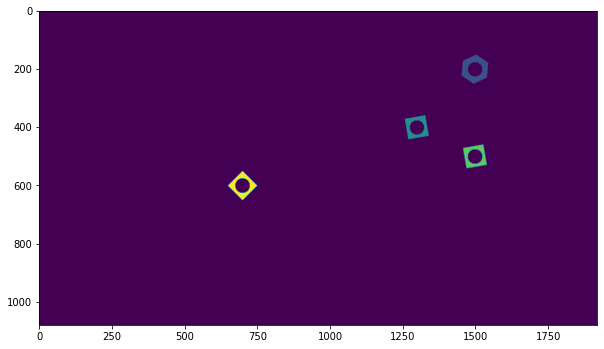

In [54]:
print('conveyor ')
print('Number of connected components: ', conv_n_labels)
print('Statistics: ')
for i in range(1,conv_n_labels):
    print('     ',i, 'The leftmost (x) coordinate: ', conv_stats[i, cv.CC_STAT_LEFT])
    print('     ',i, 'The topmost (y) coordinate: ', conv_stats[i, cv.CC_STAT_TOP])
    print('     ',i, 'The horizontal size of the bounding box: ', conv_stats[i, cv.CC_STAT_WIDTH])
    print('     ',i, 'The vertical size of the bounding box: ' ,conv_stats[i, cv.CC_STAT_HEIGHT])
    print('     ',i, 'The total area (in pixels) of the connected component: ', conv_stats[i, cv.CC_STAT_AREA])
print('Centroids: ')
print(conv_centroids )

fig,ax=plt.subplots(1,1,figsize=(10,20))
ax.imshow(conv_labels)

* Contour analysis

Link: https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html , https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0

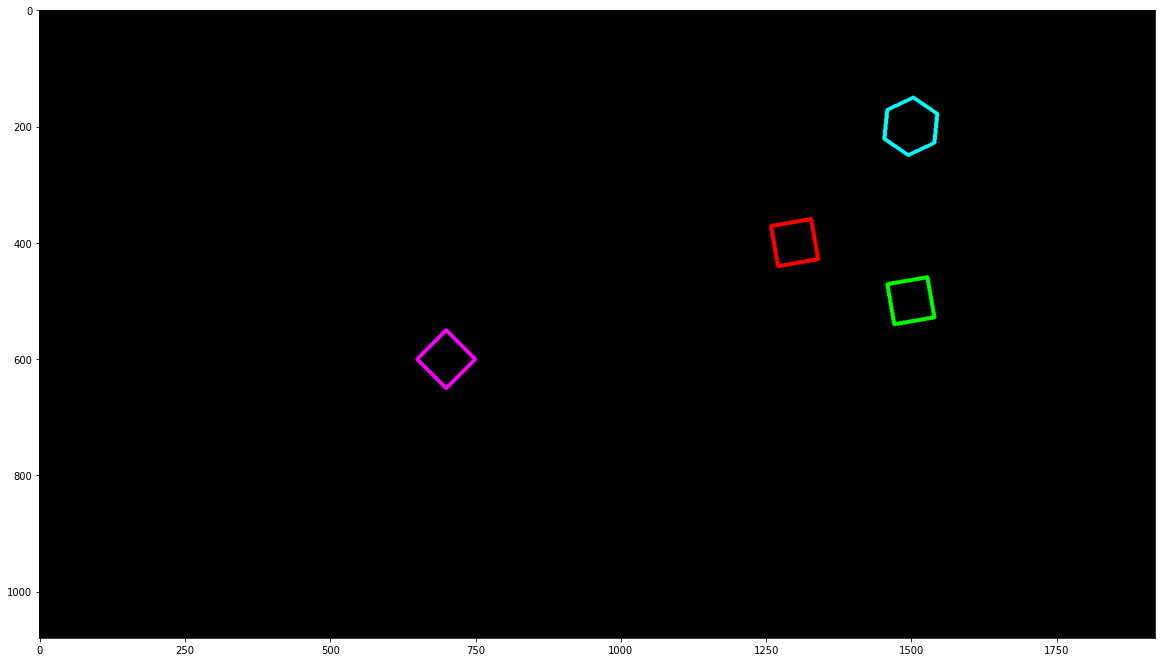

In [82]:
contours, hierarchy = cv.findContours(closing_conveyor, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
black_im = np.zeros((closing_conveyor.shape[0],closing_conveyor.shape[1],3),dtype=np.uint8)
cv.drawContours(black_im, contours, 0,(255,0,255),5)
cv.drawContours(black_im, contours, 1,(0,255,0),5)
cv.drawContours(black_im, contours, 2,(0,0,255),5)
cv.drawContours(black_im, contours, 3,(255,255,0),5)

fig, ax = plt. subplots(figsize = (20,30)) 
ax.imshow(cv.cvtColor(black_im, cv.COLOR_BGR2RGB))